In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
df = pd.read_csv('data/data-ready.csv')

df = df.drop("DateTime", axis = 1)

df_z1 = df.drop(["z2", "z3"], axis=1)
df_z2 = df.drop(["z1", "z3"], axis=1)
df_z3 = df.drop(["z1", "z2"], axis=1)

df_total = df.copy()
df_total["z_total"] = df_total["z1"] + df_total["z2"] + df_total["z3"]

# drop z1, z2, z3 from df_total
df_total = df_total.drop(["z1", "z2", "z3"], axis=1)

zones = [df_z1, df_z2, df_z3, df_total]
targets = ["z1", "z2", "z3", "z_total"]



Training Naive Bayes model for z1...
z1 Accuracy: 0.7293971766501335
z1 Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.94      0.79      2607
           1       0.82      0.60      0.69      5215
           2       0.66      0.78      0.72      2662

    accuracy                           0.73     10484
   macro avg       0.72      0.77      0.73     10484
weighted avg       0.75      0.73      0.72     10484

z1 Confusion Matrix:
[[2443  160    4]
 [1042 3123 1050]
 [  75  506 2081]]


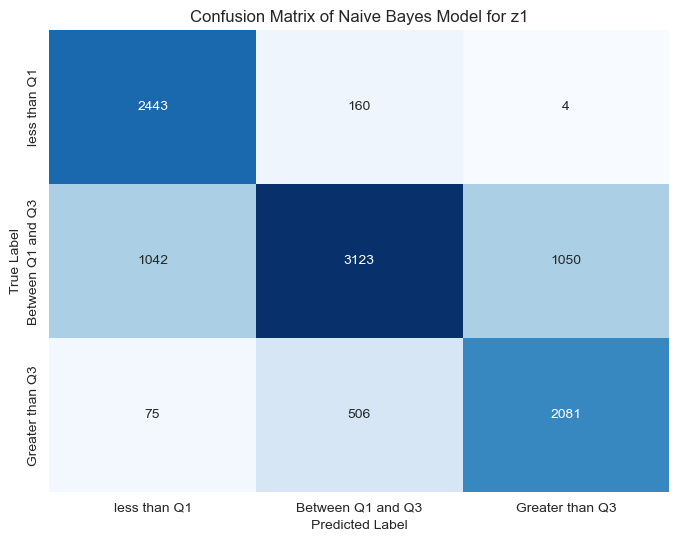


Training Naive Bayes model for z2...
z2 Accuracy: 0.6713086608164822
z2 Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.89      0.70      2581
           1       0.75      0.54      0.63      5242
           2       0.69      0.71      0.70      2661

    accuracy                           0.67     10484
   macro avg       0.67      0.71      0.68     10484
weighted avg       0.69      0.67      0.67     10484

z2 Confusion Matrix:
[[2294  269   18]
 [1576 2850  816]
 [  73  694 1894]]


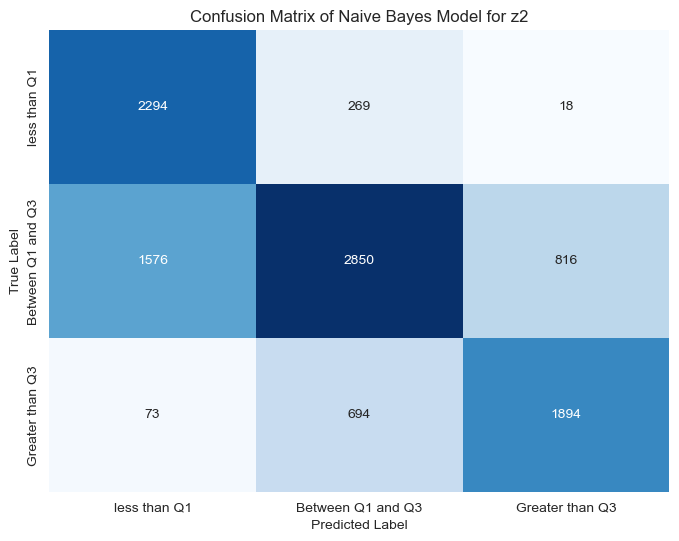


Training Naive Bayes model for z3...
z3 Accuracy: 0.6393552079359023
z3 Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.70      0.66      2583
           1       0.65      0.60      0.63      5195
           2       0.64      0.65      0.65      2706

    accuracy                           0.64     10484
   macro avg       0.64      0.65      0.64     10484
weighted avg       0.64      0.64      0.64     10484

z3 Confusion Matrix:
[[1821  725   37]
 [1130 3120  945]
 [  11  933 1762]]


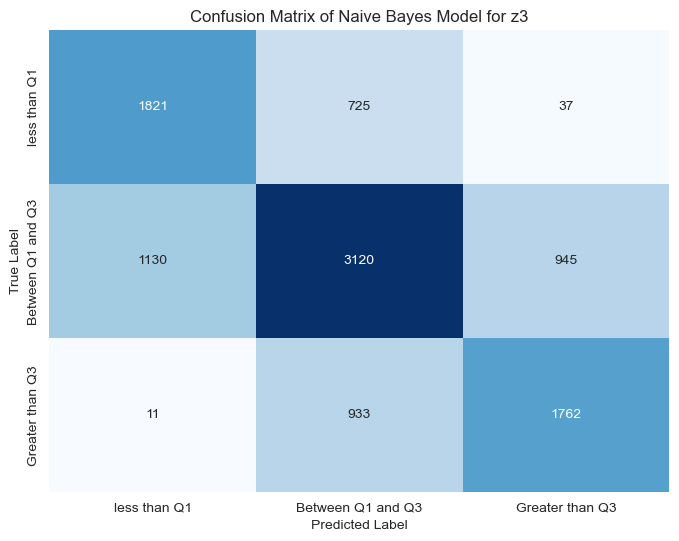


Training Naive Bayes model for z_total...
z_total Accuracy: 0.735692483784815
z_total Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.93      0.81      2617
           1       0.83      0.60      0.70      5189
           2       0.65      0.79      0.72      2678

    accuracy                           0.74     10484
   macro avg       0.73      0.78      0.74     10484
weighted avg       0.75      0.74      0.73     10484

z_total Confusion Matrix:
[[2446  161   10]
 [ 917 3139 1133]
 [  57  493 2128]]


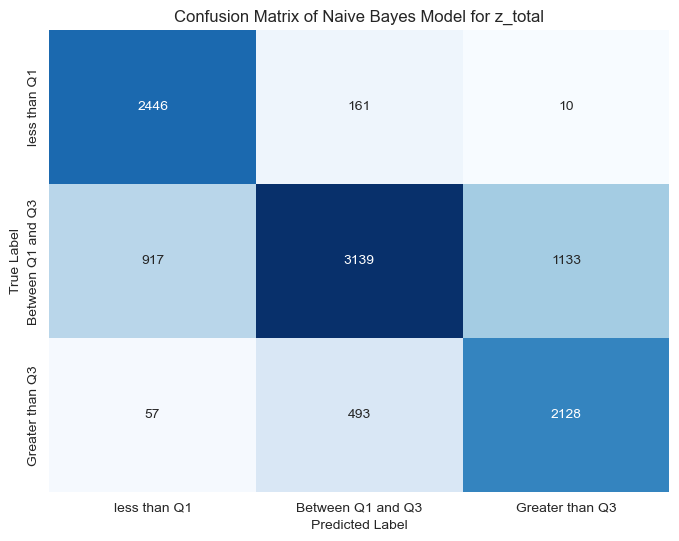

In [7]:

from matplotlib import pyplot as plt
import seaborn as sns

for zone_data, target_name in zip(zones, targets):
    print("")
    print("=============================================")
    print(f"Training Naive Bayes model for {target_name}...")

    # Features and target
    features = zone_data[['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows', 'diffuse flows', 'Year', 'IsWeekend', 'IsNight', 'HourCos', 'HourSin', 'MonthCos', 'MonthSin', 'DayCos', 'DaySin']]
    target = zone_data[target_name]

    # Normalize the features
    scaler = MinMaxScaler()
    features_scaled = scaler.fit_transform(features)

    # Bin the target variable (EnergyConsumption) into quartiles
    # target_binned = pd.qcut(target, q=4, labels=False)
    
    # bin the target variable into: less than min, between boxplot's min and boxplot's max, more than boxplot's max
    target_binned = pd.cut(target, bins=[-np.inf, target.quantile(0.25), target.quantile(0.75), np.inf], labels=False)
    

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(features_scaled, target_binned, test_size=0.2, random_state=42)

    # Define the Naive Bayes model
    nb_model = GaussianNB()

    # Train the model
    nb_model.fit(X_train, y_train)

    # Make predictions
    y_pred = nb_model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred) 
    print(f'{target_name} Accuracy: {accuracy}')
    
    # Classification report
    report = classification_report(y_test, y_pred)
    print(f'{target_name} Classification Report:\n{report}')
    
    # plot the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f'{target_name} Confusion Matrix:\n{cm}')

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['less than Q1', 'Between Q1 and Q3', 'Greater than Q3'],
                yticklabels=['less than Q1', 'Between Q1 and Q3', 'Greater than Q3'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix of Naive Bayes Model for {target_name}')
    plt.show()

    